In [17]:
#what i did was first put data into a box plot to see some of the initial outliers
#Then I found the high correlation features and tested out different values to see which had the better accuracy in the regression model
#I did the same for the importnace scores and removed the features withe the smallest importance and tested different accuracies on the regression model
#I removed the high correlation and the low accuracy features and tested again to get the new data set

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
features = pd.read_csv("features.txt", sep=r"\s+", header = None)
feature_names = features[1].tolist()
print(feature_names)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [21]:
X_train = pd.read_csv("X_train.txt", sep=r"\s+", header=None)
y_train = pd.read_csv("y_train.txt", sep=r"\s+", header=None, names=["Activity"])
X_test = pd.read_csv("X_test.txt", sep=r"\s+", header=None)
y_test = pd.read_csv("y_test.txt", sep=r"\s+", header=None, names=["Activity"])


In [22]:
X_rebecca_train = X_train.iloc[:, 240:345]
X_rebecca_test = X_test.iloc[:, 240:345]


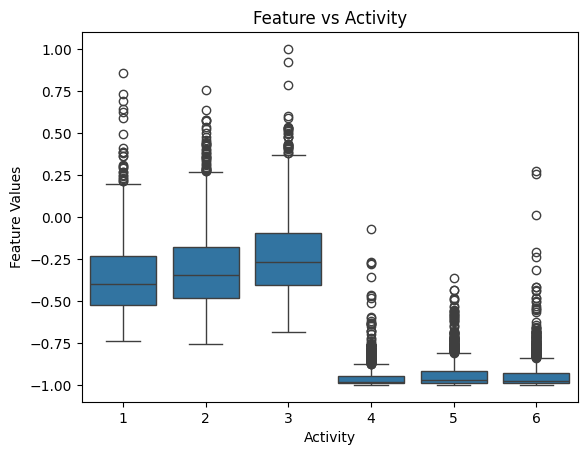

In [23]:
sns.boxplot(x=y_train["Activity"], y=X_rebecca_train.iloc[:, 0])
plt.ylabel("Feature Values")
plt.title("Feature vs Activity")
plt.show()


In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_rebecca_train, y_train["Activity"])
preds = model.predict(X_rebecca_test)

print("Accuracy:", accuracy_score(y_test["Activity"], preds))


Accuracy: 0.7872412623006447


In [25]:
import pandas as pd

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.01)
    Q3 = df.quantile(0.99)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

# Apply to your training and testing sets
X_train_no_outliers = remove_outliers_iqr(X_rebecca_train)
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

print("Original shape:", X_rebecca_train.shape)
print("After removing outliers:", X_train_no_outliers.shape)


Original shape: (7352, 105)
After removing outliers: (7327, 105)


In [26]:
model_no_outliers = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers["Activity"])
preds_no_outliers = model_no_outliers.predict(X_rebecca_test)

print("Accuracy after removing outliers:", accuracy_score(y_test["Activity"], preds_no_outliers))
print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds_no_outliers,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy after removing outliers: 0.7879199185612488

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.88      0.96      0.92       496
  WALKING_UPSTAIRS       0.83      0.89      0.86       471
WALKING_DOWNSTAIRS       0.94      0.77      0.85       420
           SITTING       0.63      0.44      0.52       491
          STANDING       0.64      0.80      0.71       532
            LAYING       0.84      0.86      0.85       537

          accuracy                           0.79      2947
         macro avg       0.79      0.79      0.78      2947
      weighted avg       0.79      0.79      0.78      2947



Model Perfomrance

Q1=.15  q3=.85
accuracy= 0.7699355276552426

Q1=.10  q3=.9
accuracy= 0.7801153715643027

Q1=.95   q3=.05
accuracy=0.7865626060400407

q1=.97   q3=.03
accuracy= 0.7869019341703427

q1=.99   q3=.01
accuracy=0.7879199185612488

In [27]:
importance = pd.Series(np.abs(model.coef_).mean(axis=0), index=range(240, 345))
importance = importance.sort_values(ascending=False)
importance.head(10)

,0
287,1.890871
293,1.576246
289,1.458264
296,1.392426
295,1.270768
260,1.265744
252,1.256508
257,1.256508
242,1.239931
268,1.075149


In [28]:
high_thresh = importance.quantile(0.75)
mid_thresh = importance.quantile(0.40)

In [29]:
def categorize_importance(val):
    if val >= high_thresh:
        return "Probably important"
    elif val >= mid_thresh:
        return "Maybe helpful"
    else:
        return "Probably not helpful"

categories = importance.apply(categorize_importance)
feature_summary = pd.DataFrame({"Feature": importance.index, "Importance": importance.values, "Category": categories})
feature_summary.head(120)


,Feature,Importance,Category
287,287,1.890871,Probably important
293,293,1.576246,Probably important
289,289,1.458264,Probably important
296,296,1.392426,Probably important
295,295,1.270768,Probably important
...,...,...,...
305,305,0.225904,Probably not helpful
329,329,0.224847,Probably not helpful
308,308,0.193017,Probably not helpful
313,313,0.179643,Probably not helpful


In [30]:
filtered_summary = feature_summary[
    feature_summary["Category"].isin(["Maybe helpful", "Probably not helpful"])
]

num_rows= filtered_summary.shape
print(num_rows)

(78, 3)


In [31]:
print(filtered_summary)

     Feature  Importance              Category
344      344    0.796059         Maybe helpful
284      284    0.793083         Maybe helpful
244      244    0.790015         Maybe helpful
291      291    0.783617         Maybe helpful
243      243    0.779189         Maybe helpful
..       ...         ...                   ...
305      305    0.225904  Probably not helpful
329      329    0.224847  Probably not helpful
308      308    0.193017  Probably not helpful
313      313    0.179643  Probably not helpful
326      326    0.169083  Probably not helpful

[78 rows x 3 columns]


In [32]:
# Rebecca's feature subset (features 240–344 inclusive)
X_rebecca_train = X_train.iloc[:, 240:345]
X_rebecca_test  = X_test.iloc[:, 240:345]

print("Training shape:", X_rebecca_train.shape)
print("Testing shape:", X_rebecca_test.shape)


Training shape: (7352, 105)
Testing shape: (2947, 105)


In [33]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_rebecca_train, y_train["Activity"])


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [34]:
preds = model.predict(X_rebecca_test)

print("Accuracy:", accuracy_score(y_test["Activity"], preds))

# Map activity numbers to names
act_map = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

print(classification_report(
    y_test["Activity"], preds,
    labels=[1,2,3,4,5,6],
    target_names=list(act_map.values())
))


Accuracy: 0.7872412623006447
                    precision    recall  f1-score   support

           WALKING       0.88      0.96      0.92       496
  WALKING_UPSTAIRS       0.83      0.89      0.86       471
WALKING_DOWNSTAIRS       0.94      0.77      0.85       420
           SITTING       0.63      0.44      0.52       491
          STANDING       0.64      0.79      0.71       532
            LAYING       0.84      0.86      0.85       537

          accuracy                           0.79      2947
         macro avg       0.79      0.79      0.78      2947
      weighted avg       0.79      0.79      0.78      2947



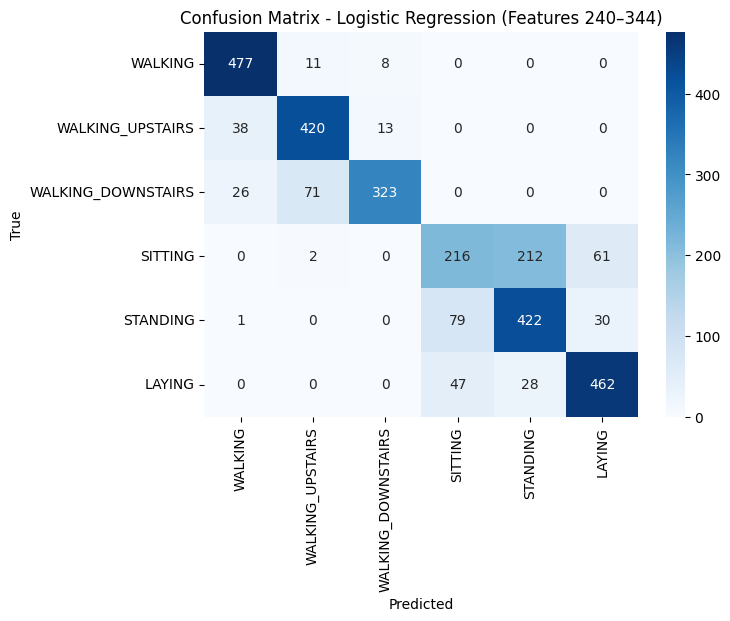

In [35]:
cm = confusion_matrix(y_test["Activity"], preds)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=act_map.values(),
            yticklabels=act_map.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression (Features 240–344)')
plt.show()


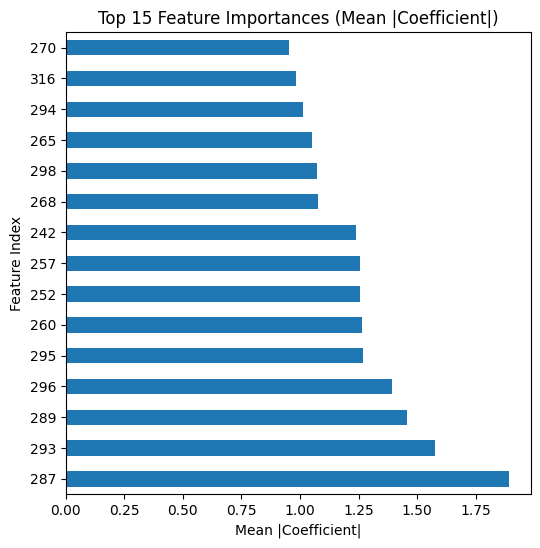

In [36]:
importance = pd.Series(np.mean(np.abs(model.coef_), axis=0),
                       index=range(240, 345)).sort_values(ascending=False)

# Top 15 features
importance.head(15).plot(kind="barh", figsize=(6,6))
plt.title("Top 15 Feature Importances (Mean |Coefficient|)")
plt.xlabel("Mean |Coefficient|")
plt.ylabel("Feature Index")
plt.show()


In [37]:
corr_matrix = X_rebecca_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
print(f"Number of highly correlated features to drop: {len(to_drop)}")
print(to_drop)

Number of highly correlated features to drop: 12
[241, 254, 257, 271, 272, 310, 311, 314, 324, 325, 328, 342]


In [38]:
corr_matrix.head(100)

,240,241,242,243,244,245,246,247,248,249,...,335,336,337,338,339,340,341,342,343,344
240,1.000000,0.996815,0.984699,0.749013,0.963899,0.944725,0.969951,0.440525,0.025963,0.070301,...,0.652970,0.624502,0.387178,0.793489,0.656221,0.634389,0.584243,0.817111,0.626193,0.883672
241,0.996815,1.000000,0.974147,0.756542,0.969765,0.944598,0.984441,0.444455,0.033160,0.075240,...,0.647503,0.618736,0.385147,0.787706,0.649362,0.630103,0.579346,0.810600,0.624987,0.887374
242,0.984699,0.974147,1.000000,0.771349,0.959532,0.940233,0.940506,0.434715,0.017131,0.036161,...,0.681396,0.650478,0.394664,0.807419,0.687122,0.661935,0.605768,0.834157,0.652703,0.894115
243,0.749013,0.756542,0.771349,1.000000,0.840627,0.762310,0.761642,0.429618,0.055316,0.093654,...,0.524571,0.517878,0.345123,0.674316,0.500728,0.509496,0.492240,0.685842,0.502436,0.751796
244,0.963899,0.969765,0.959532,0.840627,1.000000,0.943392,0.964799,0.471608,0.018713,0.060114,...,0.655847,0.627304,0.396794,0.805860,0.640102,0.638777,0.589403,0.825394,0.633006,0.920252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.652970,0.647503,0.681396,0.524571,0.655847,0.705622,0.635008,0.155056,0.233933,0.191289,...,1.000000,0.823709,0.537254,0.622061,0.801053,0.925330,0.779168,0.675432,0.862928,0.687520
336,0.624502,0.618736,0.650478,0.517878,0.627304,0.655240,0.604847,0.184833,0.187133,0.148967,...,0.823709,1.000000,0.748417,0.616353,0.716535,0.778706,0.976910,0.660319,0.739883,0.642798
337,0.387178,0.385147,0.394664,0.345123,0.396794,0.394512,0.378972,0.155761,0.036150,0.019914,...,0.537254,0.748417,1.000000,0.438367,0.362964,0.471618,0.872837,0.450645,0.398253,0.370424
338,0.793489,0.787706,0.807419,0.674316,0.805860,0.818368,0.769613,0.265009,0.013858,0.055767,...,0.622061,0.616353,0.438367,1.000000,0.551818,0.586068,0.594737,0.993423,0.541861,0.675663


In [39]:
X_rebecca_train_reduced = X_rebecca_train.drop(columns=to_drop)
X_rebecca_test_reduced  = X_rebecca_test.drop(columns=to_drop)

print("Reduced training shape:", X_rebecca_train_reduced.shape)
print("Reduced testing shape:", X_rebecca_test_reduced.shape)


Reduced training shape: (7352, 93)
Reduced testing shape: (2947, 93)


In [40]:
model_reduced = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_reduced.fit(X_rebecca_train_reduced, y_train["Activity"])

preds_reduced = model_reduced.predict(X_rebecca_test_reduced)

# --- Evaluate accuracy and classification report ---
print("Accuracy (reduced feature set):", accuracy_score(y_test["Activity"], preds_reduced))

act_map = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds_reduced,
    labels=[1,2,3,4,5,6],
    target_names=list(act_map.values())
))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (reduced feature set): 0.7885985748218527

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.87      0.97      0.92       496
  WALKING_UPSTAIRS       0.85      0.89      0.87       471
WALKING_DOWNSTAIRS       0.94      0.77      0.85       420
           SITTING       0.63      0.44      0.52       491
          STANDING       0.64      0.79      0.71       532
            LAYING       0.84      0.86      0.85       537

          accuracy                           0.79      2947
         macro avg       0.79      0.79      0.78      2947
      weighted avg       0.79      0.79      0.78      2947



Model Perfomrance

Corr > .99
Accuracy = 0.7885985748218527

Corr >.98
Accuracy = 0.7807940278249067

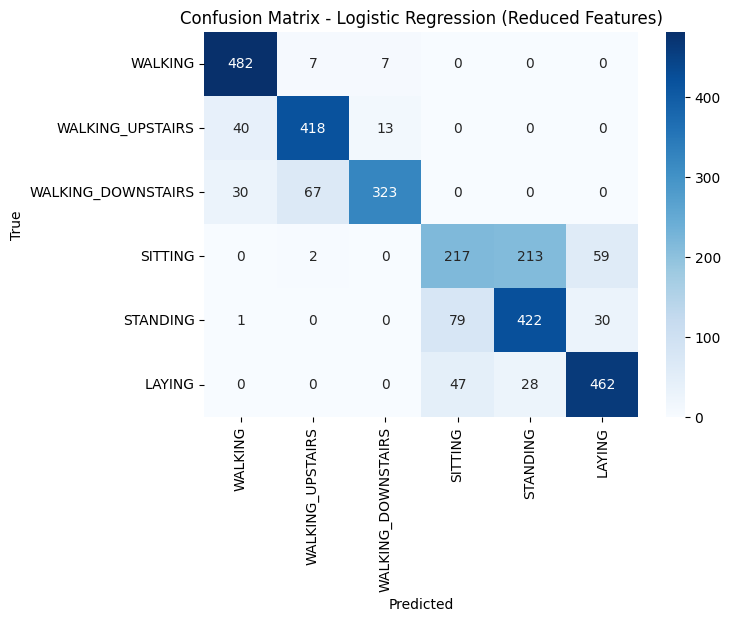

In [41]:
cm = confusion_matrix(y_test["Activity"], preds_reduced)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=act_map.values(),
            yticklabels=act_map.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression (Reduced Features)')
plt.show()


In [42]:
low_importance_features = feature_summary[feature_summary["Importance"] < 0.3]["Feature"].tolist()
print(f"Removing {len(low_importance_features)} low-importance features:", low_importance_features)

# Drop those features from training and test sets
X_rebecca_train_reduced2 = X_rebecca_train.drop(columns=low_importance_features, errors='ignore')
X_rebecca_test_reduced2 = X_rebecca_test.drop(columns=low_importance_features, errors='ignore')

print("New training shape:", X_rebecca_train_reduced2.shape)

Removing 19 low-importance features: [306, 343, 341, 333, 335, 319, 327, 309, 325, 321, 315, 303, 311, 318, 305, 329, 308, 313, 326]
New training shape: (7352, 86)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_reduced2 = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_reduced2.fit(X_rebecca_train_reduced2, y_train["Activity"])

preds_reduced2 = model_reduced2.predict(X_rebecca_test_reduced2)

print("Accuracy after removing low-importance features:", accuracy_score(y_test["Activity"], preds_reduced2))
print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds_reduced2,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy after removing low-importance features: 0.7882592466915507

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.88      0.96      0.92       496
  WALKING_UPSTAIRS       0.84      0.89      0.86       471
WALKING_DOWNSTAIRS       0.94      0.77      0.85       420
           SITTING       0.64      0.44      0.52       491
          STANDING       0.64      0.79      0.71       532
            LAYING       0.84      0.86      0.85       537

          accuracy                           0.79      2947
         macro avg       0.79      0.79      0.78      2947
      weighted avg       0.79      0.79      0.78      2947



Model Perfomrance

Importance < .3       
**acccuracy** =.788259


Importance < .4
**accuracy** = 0.7862232779097387


Importance <.2
**accuracy** = 0.7869019341703427


In [44]:
features_to_remove = list(set(to_drop + low_importance_features))
X_rebecca_train_final = X_rebecca_train.drop(columns=features_to_remove, errors='ignore')
X_rebecca_test_final  = X_rebecca_test.drop(columns=features_to_remove, errors='ignore')
model_final = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_final.fit(X_rebecca_train_final, y_train["Activity"])
preds_final = model_final.predict(X_rebecca_test_final)

# Evaluate
print("Accuracy (after removing low importance + high correlation):",
      accuracy_score(y_test["Activity"], preds_final))

print("\nClassification Report:")
print(classification_report(
    y_test["Activity"], preds_final,
    labels=[1,2,3,4,5,6],
    target_names=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (after removing low importance + high correlation): 0.7889379029521547

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.87      0.97      0.92       496
  WALKING_UPSTAIRS       0.85      0.89      0.87       471
WALKING_DOWNSTAIRS       0.94      0.77      0.85       420
           SITTING       0.63      0.44      0.52       491
          STANDING       0.64      0.79      0.71       532
            LAYING       0.84      0.86      0.85       537

          accuracy                           0.79      2947
         macro avg       0.79      0.79      0.79      2947
      weighted avg       0.79      0.79      0.78      2947



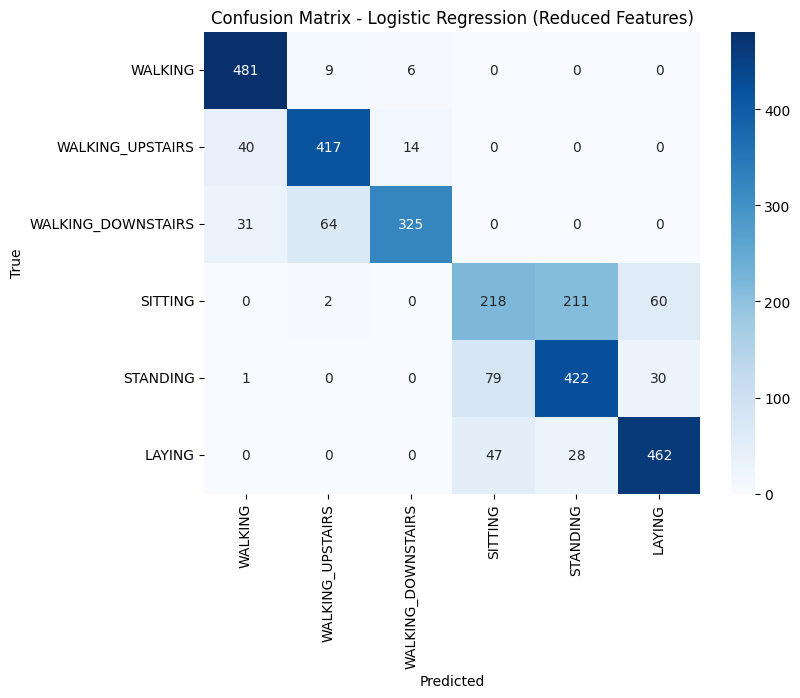

In [45]:
cm = confusion_matrix(y_test["Activity"], preds_final)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"],
            yticklabels=["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression (Reduced Features)")
plt.show()

# Accuracy (after removing low importance + high correlation): 0.7889379029521547
